In [4]:
# commands for the terminal/console
conda install mamba -n base -c conda-forge
mamba create -n appendicitis_env python=3.10 pandas tensorflow seaborn scikit-learn
conda activate appendicitis_env
pip install ucimlrepo # for getting the uci data

Channels:
 - conda-forge
 - rapidsai
 - nvidia
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/fabianburki/miniconda3

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    c-ares-1.28.1              |       h10d778d_0         149 KB  conda-forge
    conda-24.3.0               |  py312hb401068_0         1.1 MB  conda-forge
    libcurl-8.7.1              |       h726d00d_0         369 KB  conda-forge
    libmamba-1.5.8             |       ha449628_0         1.2 MB  conda-forge
    libmambapy-1.5.8           |  py312h67f5953_0         266 KB  conda-forge
    mamba-1.5.8                |  py312ha12221d_0          64 KB  conda-forge
    openssl-3.3.0              |       hd75f5a5_0         2.4 MB  conda-forge
    -----------

In [11]:
!pip install simpletransformers
!pip install ucimlrepo
!pip3 install torch torchvision torchaudio
!pip install python-dotenv # to read for .env file
!pip install openpyxl # for reading xls file
!pip install xlrd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.2 MB/s eta 0:00:0000:0100:01


In [7]:
conda list

# packages in environment at /Users/fabianburki/miniconda3/envs/appendicitis_env:
#
# Name                    Version                   Build  Channel
absl-py                   2.1.0              pyhd8ed1ab_0    conda-forge
aiohttp                   3.9.5           py310hb372a2b_0    conda-forge
aiosignal                 1.3.1              pyhd8ed1ab_0    conda-forge
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
astunparse                1.6.3              pyhd8ed1ab_0    conda-forge
async-timeout             4.0.3              pyhd8ed1ab_0    conda-forge
attrs                     23.2.0             pyh71513ae_0    conda-forge
blinker                   1.8.1              pyhd8ed1ab_0    conda-forge
brotli                    1.1.0                h0dc2134_1    conda-forge
brotli-bin                1.1.0                h0dc2134_1    conda-forge
brotli-python             1.1.0           py31

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

2024-05-17 23:40:37.638547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 

# metadata 
print(regensburg_pediatric_appendicitis.metadata) 
  
# variable information 
print(regensburg_pediatric_appendicitis.variables) 


{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [4]:
# data (as pandas dataframes) 
import pandas as pd
rpa_features = pd.DataFrame(regensburg_pediatric_appendicitis.data.features)
rpa_targets = regensburg_pediatric_appendicitis.data.targets 

In [38]:
rpa_features.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [5]:
rpa_targets.head()

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis


In [ ]:
rpa_features.info()

In [9]:
rpa_features.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000


In [172]:
# from https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45:
cat_df = rpa_features.select_dtypes(include=['object'])
num_df = rpa_features.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Sex
Appendix_on_US
Migratory_Pain
Lower_Right_Abd_Pain
Contralateral_Rebound_Tenderness
Coughing_Pain
Nausea
Loss_of_Appetite
Neutrophilia
Ketones_in_Urine
RBC_in_Urine
WBC_in_Urine
Dysuria
Stool
Peritonitis
Psoas_Sign
Ipsilateral_Rebound_Tenderness
US_Performed
Free_Fluids
Appendix_Wall_Layers
Target_Sign
Appendicolith
Perfusion
Perforation
Surrounding_Tissue_Reaction
Appendicular_Abscess
Abscess_Location
Pathological_Lymph_Nodes
Lymph_Nodes_Location
Bowel_Wall_Thickening
Conglomerate_of_Bowel_Loops
Ileus
Coprostasis
Meteorism
Enteritis
Gynecological_Findings

Numeric columns:
Age
BMI
Height
Weight
Length_of_Stay
Alvarado_Score
Paedriatic_Appendicitis_Score
Appendix_Diameter
Body_Temperature
WBC_Count
Neutrophil_Percentage
Segmented_Neutrophils
RBC_Count
Hemoglobin
RDW
Thrombocyte_Count
CRP


Check for missing values

In [173]:
# from https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(rpa_features)

Age => 1
BMI => 27
Sex => 2
Height => 26
Weight => 3
Length_of_Stay => 4
Alvarado_Score => 52
Paedriatic_Appendicitis_Score => 52
Appendix_on_US => 5
Appendix_Diameter => 284
Migratory_Pain => 9
Lower_Right_Abd_Pain => 8
Contralateral_Rebound_Tenderness => 15
Coughing_Pain => 16
Nausea => 8
Loss_of_Appetite => 10
Body_Temperature => 7
WBC_Count => 6
Neutrophil_Percentage => 103
Segmented_Neutrophils => 728
Neutrophilia => 50
RBC_Count => 18
Hemoglobin => 18
RDW => 26
Thrombocyte_Count => 18
Ketones_in_Urine => 200
RBC_in_Urine => 206
WBC_in_Urine => 199
CRP => 11
Dysuria => 29
Stool => 17
Peritonitis => 9
Psoas_Sign => 37
Ipsilateral_Rebound_Tenderness => 163
US_Performed => 4
Free_Fluids => 63
Appendix_Wall_Layers => 564
Target_Sign => 644
Appendicolith => 713
Perfusion => 719
Perforation => 701
Surrounding_Tissue_Reaction => 530
Appendicular_Abscess => 697
Abscess_Location => 769
Pathological_Lymph_Nodes => 579
Lymph_Nodes_Location => 661
Bowel_Wall_Thickening => 683
Conglomerate_of_

### Data Cleaning

In [174]:
# join features and targets for data cleaning
rpa_combined = rpa_features.join(rpa_targets)
# copy the data frame to restore mistakes
# (if not copied the the new variable references the SAME data frame)
rpa_combined_cleaning = rpa_combined.copy()



In [176]:
# define the variable groups (as defined by the data originaters)
clinical_group = ['Peritonitis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Psoas_Sign', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'Dysuria', 'Stool']
laboratory_group = ['WBC_Count', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Neutrophil_Percentage', 'Neutrophilia', 'Segmented_Neutrophils', 'CRP', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']
ultrasound_group = ['US_Performed', 'Appendix_on_US', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Perfusion', 'Surrounding_Tissue_Reaction', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Appendicolith', 'Perforation', 'Appendicular_Abscess', 'Abscess_Location', 'Conglomerate_of_Bowel_Loops', 'Gynecological_Findings']
demographic_group = ['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Length_of_Stay']

Renaming values

In [177]:
# convert 'NaN' strings to actual nan
rpa_combined_cleaning.replace('NaN', np.nan, inplace=True)

Look at outliers

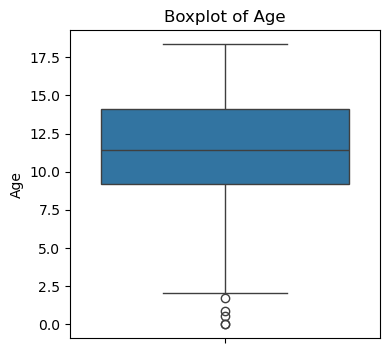

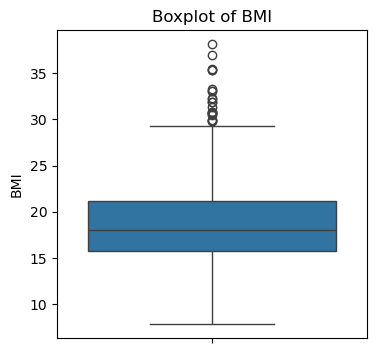

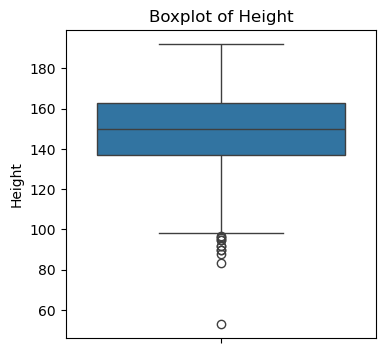

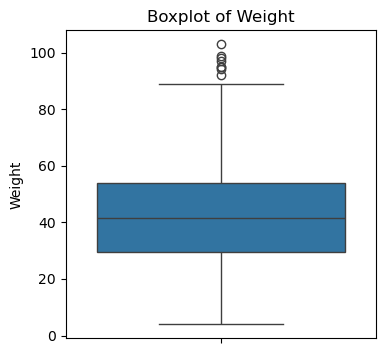

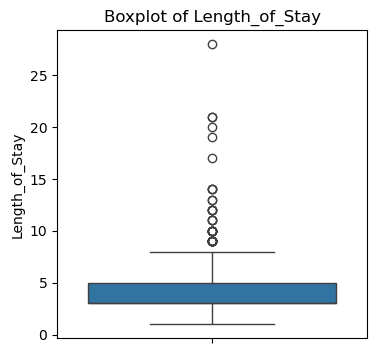

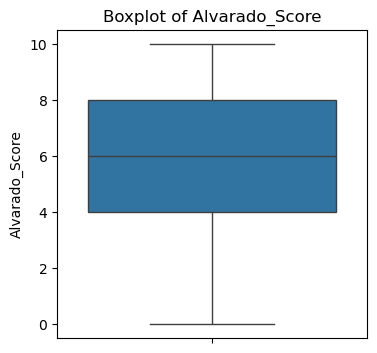

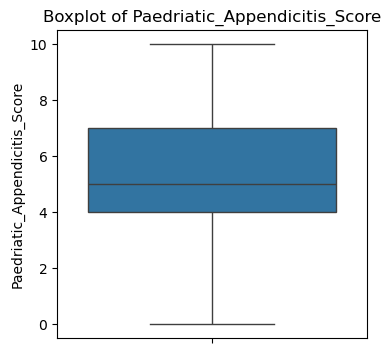

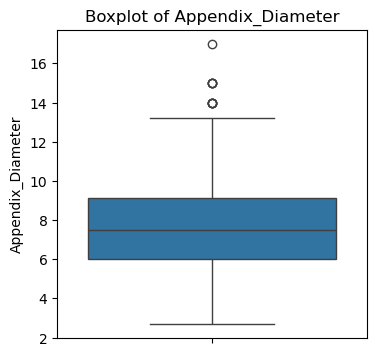

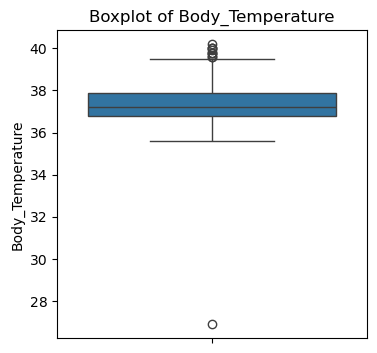

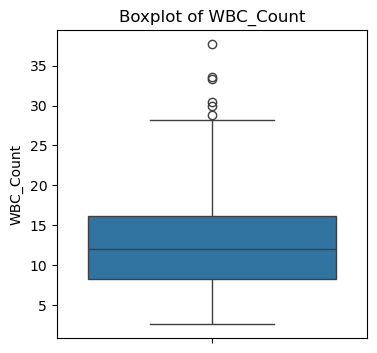

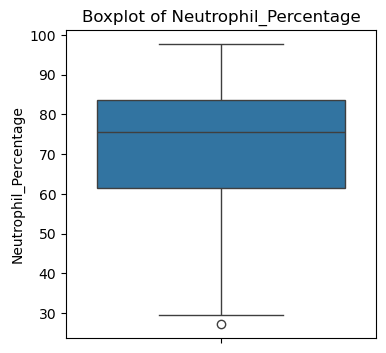

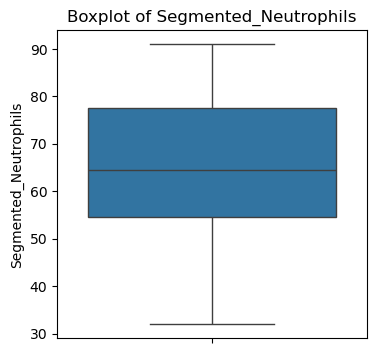

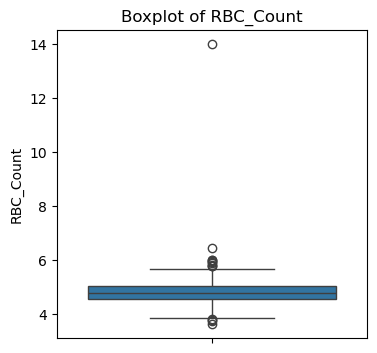

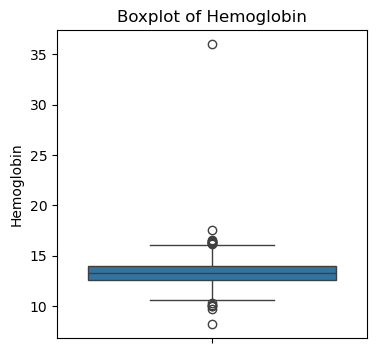

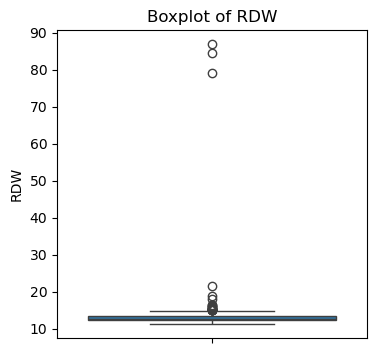

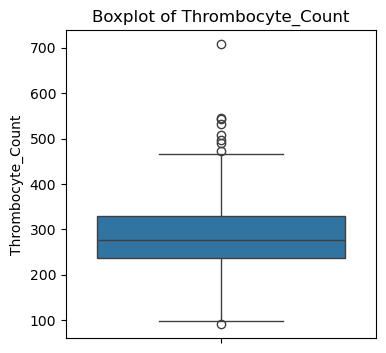

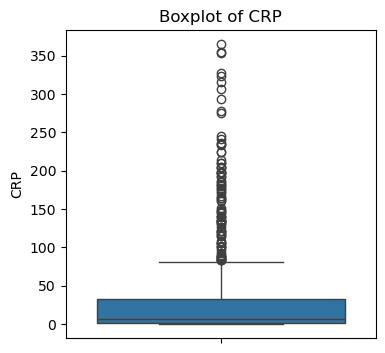

In [178]:
# find outliers
import seaborn as sns 
# select only numeric columns
numeric_columns = rpa_combined_cleaning.select_dtypes(include='number').columns
# create a boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=rpa_combined_cleaning[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [179]:
# handle outliers
rpa_combined_cleaning = rpa_combined_cleaning.drop([221]) # body_temperature 26.9 celsius degree not viable
rpa_combined_cleaning = rpa_combined_cleaning.drop([203]) # RBC_Count 14 G/L massive outlier
rpa_combined_cleaning = rpa_combined_cleaning.drop([564]) # hemoglobin 34 g/L not plausible

### Remove NAs

Set NAs to zero

In [180]:
""" not suitable for neural network since data in collumn becomes strings: 
# rename the appendix_diameter entries to 'not_found_on_us' if Appendix_on_US is 'no' (almost all NA) 
rpa_combined_cleaning.loc[rpa_combined_cleaning['Appendix_on_US'] == 'no', 'Appendix_Diameter'] = 'not_found_on_us'
"""
# set appendix_diameter entries to zero if Appendix_on_US is 'no' (almost all NA)
rpa_combined_cleaning.loc[rpa_combined_cleaning['Appendix_on_US'] == 'no', 'Appendix_Diameter'] = 0

# reconsider this while evaluating the model

Calculate missing values

In [181]:
# calculate missing BMI in one row
rpa_combined_cleaning.loc[550, 'BMI'] = rpa_combined_cleaning.loc[550, 'Weight'] / ((rpa_combined_cleaning.loc[550, 'Height']/100) * (rpa_combined_cleaning.loc[550, 'Height']/100))

Convert NAs in clinical group to "unknown"

In [182]:
clinical_group_mod = clinical_group.remove('Body_Temperature') # remove numeric collumns from group
# create dictionary to map each prefixed column name to the replacement value 'unknown'
fill_clin_na_dict = {col: 'unknown' for col in clinical_group}
# replace NAs in findings with 'Unknown'
rpa_combined_cleaning.fillna(fill_clin_na_dict, inplace=True)

Convert NAs in ultrasound group to "no_us_finding"

In [183]:
# select non-numeric columns
non_numeric_columns = rpa_combined_cleaning.select_dtypes(exclude='number').columns
# create dictionary to map non-numeric column to 'no_us_finding'
fill_us_na_dict = {col: 'no_us_finding' for col in non_numeric_columns if col in ultrasound_group}
# replace NAs in the non-numeric columns with 'no_us_finding'
rpa_combined_cleaning.fillna(fill_us_na_dict, inplace=True)

Remove rows

In [184]:
# remove rows with few missing NAs (use loc!!)
# cols = ['Age', 'Sex', 'Length_of_Stay', 'US_Performed', 'Body_Temperature', 'Height', 'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'WBC_Count', 'RBC_Count', 'Hemoglobin', 'Thrombocyte_Count', 'CRP']
cols = ['Age', 'Sex', 'Length_of_Stay', 'US_Performed', 'Body_Temperature', 'Height', 'Appendix_Diameter', 'WBC_Count', 'RBC_Count', 'Hemoglobin', 'Thrombocyte_Count', 'CRP']
for col in cols:
    rpa_combined_cleaning = rpa_combined_cleaning.loc[rpa_combined_cleaning[col].notna()] # use .loc to access the row!!

In [13]:
""" not suitable for neural network since data in collumn become strings: 

# create dictionary to map each prefixed column name to the replacement value 'no_lab_result'
fill_lab_na_dict = {col: 'no_lab_result' for col in laboratory_group}
# replace NAs in findings with 'Unknown'
rpa_combined_cleaning.fillna(fill_lab_na_dict, inplace=True)

"""

Drop collumns with too many NAs

In [185]:
#  Alvarado_Score & Paedriatic_Appendicitis_Score: 6% missing (45); Neutrophil_Percentage: 13% missing (96); Segmented_Neutrophils 93% missing; Neutrophilia 6% missing; RDW 3% missing and prob no relevant; Ketones_in_Urine, RBC_in_Urine & WBC_in_Urine 25% missing; Dysuria 3% missing and 91% no; Psoas_Sign 4% missing; Ipsilateral_Rebound_Tenderness 20% missing; Free_Fluids 7% missing; 
rpa_combined_cleaning = rpa_combined_cleaning.drop(columns=['Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia', 'RDW', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine'])

Remove faulty data

In [186]:
# select rows via labeled index like rpa_combined_cleaning.loc[[656, 638, 405]])
# drop these rows directly via drop method
rpa_combined_cleaning = rpa_combined_cleaning.drop([656, 638]) # cases with height > 140 cm, but age < 1 -> faulty data

For better overview rename collumns based on variable group

In [19]:
"""
# add prefix to column names based on variable group (as stated in app_data.xlsx)
def add_prefix_to_colgroup_in_df(prefix, colgroup, df):
    # create dict to map col names
    column_map = {col: prefix + col for col in colgroup}
    # rename col using the dict
    df.rename(columns=column_map, inplace=True)

add_prefix_to_colgroup_in_df('CLIN_',clinical_group,rpa_combined_cleaning)
add_prefix_to_colgroup_in_df('LAB_',laboratory_group,rpa_combined_cleaning)
add_prefix_to_colgroup_in_df('US_',ultrasound_group,rpa_combined_cleaning)
add_prefix_to_colgroup_in_df('DEM_',demographic_group,rpa_combined_cleaning)

# create new lists with prefixes for later filtering purposes 
clinical_group_prefixed = ['CLIN_' + item for item in clinical_group]
laboratory_group_prefixed = ['LAB_' + item for item in laboratory_group]
ultrasound_group_prefixed = ['US_' + item for item in ultrasound_group]
demographic_group_prefixed = ['DEM_' + item for item in ultrasound_group]
"""

After cleaning

In [187]:
# after cleaning
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(rpa_combined_cleaning)

no missing values left


Separate features & labels again

In [188]:
# after cleaning, separate features and targets again
rpa_combined_cleaned = rpa_combined_cleaning.copy()
rpa_targets_cleaned = rpa_combined_cleaned[["Management", "Severity", "Diagnosis"]]
rpa_features_cleaned = rpa_combined_cleaned.drop(columns=["Management", "Severity", "Diagnosis"])

## Training preparation

Transform data

In [189]:
rpa_targets_transforming = rpa_targets_cleaned.copy()
rpa_features_transforming = rpa_features_cleaned.copy()

One-hot encode the target labels

In [190]:
# one-hot encode each column
rpa_targets_transformed = pd.get_dummies(rpa_targets_transforming)

One-hot encode the features

In [191]:
# select categorical columns
categorical_columns = rpa_features_transforming.select_dtypes(include='object').columns

# one-hot encode categorical columns
rpa_features_transforming = pd.get_dummies(rpa_features_transforming, columns=categorical_columns)

Scale numeric data between 0 and 1

In [192]:
# scale numerical data for the neural network to function correctly
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
 
# select numeric columns
numeric_columns = rpa_features_transforming.select_dtypes(include='number').columns

# scale the numeric columns
rpa_features_transforming[numeric_columns] = scaler.fit_transform(rpa_features_transforming[numeric_columns])

In [193]:
rpa_features_transformed = rpa_features_transforming.copy()

In [200]:

# Example data, replace with your actual data
# x_train and y_train should be numpy arrays
rpa_features_transformed = np.array(rpa_features_transformed).astype('float32')
rpa_targets_transformed = np.array(rpa_targets_transformed).astype('float32')
"""
# Check shapes
print(f"x_train shape: {rpa_features_transformed.shape}")
print(f"y_train shape: {rpa_targets_transformed.shape}")
"""

'\n# Check shapes\nprint(f"x_train shape: {rpa_features_transformed.shape}")\nprint(f"y_train shape: {rpa_targets_transformed.shape}")\n'

Split into train & test data

In [201]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rpa_features_transformed, rpa_targets_transformed, test_size = 0.2)

Model training

In [195]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

In [219]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 5
model_args.learning_rate = 1e-4

Model 1 (extremely bad)

In [203]:
# Define the model
model = Sequential([
    Dense(units=256, activation='relu', input_shape=(147,)),
    Dropout(rate=0.4),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=8, activation='softmax')
])
# densle layer has to have as many units as the target data collumns

# Print model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               37888     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 71816 (280.53 KB)
Trainable params: 71816 (280.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 2 - with batch norm. and bigger (bit better)

In [220]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
    Dense(units=512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.4),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.3),
    Dense(units=y_train.shape[1], activation='softmax')  # Match this to the number of classes in y_train
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               75776     
                                                                 
 batch_normalization_12 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_13 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 256)             

In [221]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Epoch 1/30
4/4 [==============================] - 2s 91ms/step - loss: 8.6166 - accuracy: 0.1503 - val_loss: 6.0288 - val_accuracy: 0.6000
Epoch 2/30
4/4 [==============================] - 0s 18ms/step - loss: 7.6361 - accuracy: 0.2462 - val_loss: 5.8219 - val_accuracy: 0.5739
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 7.5325 - accuracy: 0.3094 - val_loss: 5.6036 - val_accuracy: 0.4957
Epoch 4/30
4/4 [==============================] - 0s 17ms/step - loss: 7.6268 - accuracy: 0.3682 - val_loss: 5.4221 - val_accuracy: 0.4696
Epoch 5/30
4/4 [==============================] - 0s 18ms/step - loss: 7.5202 - accuracy: 0.4466 - val_loss: 5.3135 - val_accuracy: 0.4870
Epoch 6/30
4/4 [==============================] - 0s 17ms/step - loss: 7.8280 - accuracy: 0.3791 - val_loss: 5.3009 - val_accuracy: 0.4957
Epoch 7/30
4/4 [==============================] - 0s 17ms/step - loss: 7.8642 - accuracy: 0.4357 - val_loss: 5.3880 - val_accuracy: 0.4870
Epoch 8/30
4/4 [===========

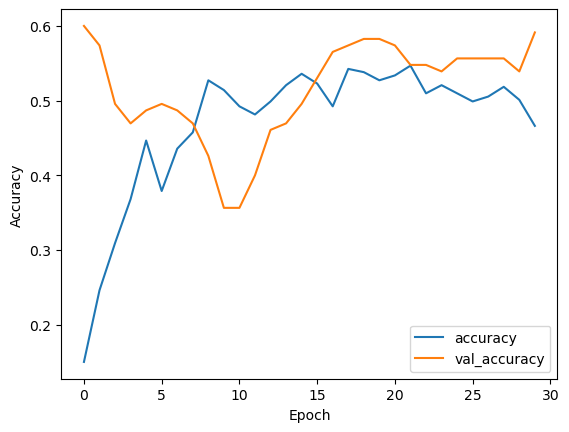

In [222]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Image processing with CNN

Perpare mapping of images to patients and targets

In [13]:
import pandas as pd

df = pd.read_excel('appendicitis_data/app_data.xlsx')
print(df['US_Number'])

0      882.0
1      883.0
2      884.0
3      886.0
4      887.0
       ...  
777    126.0
778      NaN
779    127.0
780    128.0
781    129.0
Name: US_Number, Length: 782, dtype: float64


Load images

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-25 14:47:37.929690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load the directory from the .env-file (US_IMAGES_PATH='path/to/the/images/folder')
import os
from dotenv import load_dotenv
load_dotenv()
us_dir = os.getenv('US_IMAGES_PATH')


In [ ]:
# paper authors resized to 400 × 400 px2 using zero padding when needed

Split into train & test images

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rpa_features_transformed, rpa_targets_transformed, test_size = 0.2)

In [ ]:
# from https://msalamiitd.medium.com/how-to-pass-image-datasets-to-cnn-models-using-image-data-generations-b2d9497c7a35

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)